<a href="https://colab.research.google.com/github/NeetaTaneja/GL/blob/master/R8_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Botanical research

* University’s management require an automation which can create a classifier capable of determining a plant's species from a photo
* train and compare image classifier models using supervised learning
classifier, neural network classifier and a CNN classifier

##  The dataset comprises of images from 12 plant species


Import the data. Analyse the dimensions of the data. Visualise the data

In [1]:
%tensorflow_version 2.x
import tensorflow

In [2]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
project_path = "/content/gdrive/MyDrive/CNN/Project1"
train_file = "Dataset - Plant-seedlings-classification.zip"
test_file = "Dataset - Images.zip"
predictions_file = "Dataset - Prediction.zip"

In [5]:
import os
os.chdir(project_path)

In [6]:
#from zipfile import ZipFile
#with ZipFile(project_path + "/" + train_file,'r') as z:
#  z.extractall()

In [7]:
#from zipfile import ZipFile
#with ZipFile(project_path + "/" + test_file,'r') as z:
#  z.extractall()

In [8]:
#from zipfile import ZipFile
#with ZipFile(project_path + "/" + predictions_file,'r') as z:
#    z.extractall()

In [9]:
X = []
y = []
#X = pd.DataFrame(columns=['Image'])
#y = pd.DataFrame(columns=['Label'])

In [10]:
#project_path = "/content"

In [11]:
os.listdir()

['Dataset - Images.zip',
 'Dataset - Prediction.zip',
 'Dataset - Plant-seedlings-classification.zip',
 'Images',
 'Prediction',
 '__MACOSX',
 'sample_submission.csv',
 'R8-Project1.ipynb',
 'test',
 'train']

In [12]:
os.chdir(project_path + '/train')

In [13]:
os.listdir()

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [14]:
import cv2

#### Import the train data, resize it to 128*128, store it in x_train,y_train

In [15]:
for i in os.listdir():
  count = 0;
  #print(i)
  for j in os.listdir(i):
    file_name = project_path + "/train" + "/" + i + "/" + j
    #print(file_name)
    temp = cv2.imread(file_name)
    temp = cv2.resize(temp, (128,128))
    #temp = temp.reshape(-1)
    X.append(temp)
    y.append(i)
    count = count + 1
    #if (count == 100):
     # break

#### Import the test data, resize it to 128*128, store it in x_test,y_test

In [16]:
os.chdir(project_path + '/test')
x_predict = []

In [17]:
#os.listdir()

In [18]:
for i in os.listdir():
  #print(i)
  file_name = project_path + "/test" + "/" + i
  #print(file_name)
  temp = cv2.imread(file_name)
  temp = cv2.resize(temp, (128,128))
  x_predict.append(temp)

In [19]:
print("Number of images in X = ",len(X))
print("Shape of each image in X ", X[0].shape)

Number of images in X =  4750
Shape of each image in X  (128, 128, 3)


In [20]:
import numpy as np
print("There are {} unique classes to predict.".format(np.unique(y).shape[0]))

There are 12 unique classes to predict.


#### Visualize a few elements and their labels

Label: Black-grass


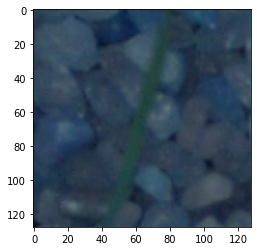

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y[100]))
plt.imshow(X[100], cmap='gray')

Label: Cleavers


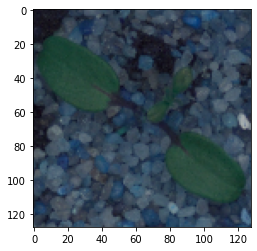

In [22]:
print("Label: {}".format(y[800]))
plt.imshow(X[800], cmap='gray')

Label: Charlock


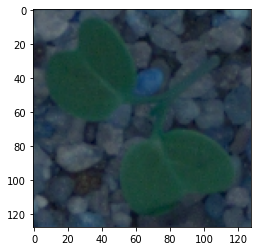

In [23]:
print("Label: {}".format(y[300]))
plt.imshow(X[300], cmap='gray')

Shape of each image in the training data:  (128, 128, 3)


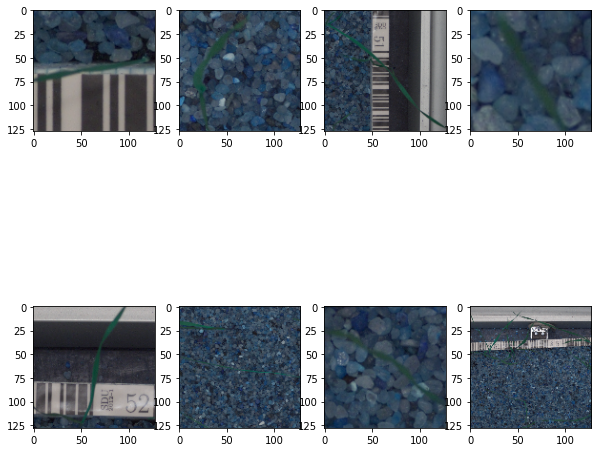

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = X[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print('Shape of each image in the training data: ', X[0].shape)

### Normalize the data

In [25]:
X = [x.astype('float32') for x in X]
X = [ x/255 for x in X]

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [27]:
print("Unique values of labels after encoding are ", np.unique(y))

Unique values of labels after encoding are  [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [28]:
y[90]

0

##### Split the data in test and train set

### Fit the Logistic Regression classifier

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25,random_state=10)

In [30]:
print(len(X_train), len(X_test))
print(y_train.shape, y_test.shape)

3562 1188
(3562,) (1188,)


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which seedling they actually are.

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [32]:
X_train = [x.flatten() for x in X_train]
X_test = [x.flatten() for x in X_test]

In [33]:
X_train[0].shape

(49152,)

In [34]:
X_train[0]

array([0.13725491, 0.16078432, 0.23529412, ..., 0.1254902 , 0.21960784,
       0.34117648], dtype=float32)

In [35]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [36]:
lr_pred = lr.predict(X_test)

#### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [37]:
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression Test Accuracy")
print(accuracy_score(y_test, lr_pred))
print("*" * 50)
print(classification_report(y_test,lr_pred))

Logistic Regression Test Accuracy
0.4941077441077441
**************************************************
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        63
           1       0.63      0.53      0.58        96
           2       0.59      0.61      0.60        71
           3       0.54      0.56      0.55       156
           4       0.28      0.19      0.22        58
           5       0.45      0.46      0.45       125
           6       0.51      0.70      0.59       149
           7       0.46      0.37      0.41        51
           8       0.45      0.56      0.50       135
           9       0.25      0.16      0.20        56
          10       0.73      0.69      0.71       116
          11       0.36      0.32      0.34       112

    accuracy                           0.49      1188
   macro avg       0.46      0.45      0.45      1188
weighted avg       0.48      0.49      0.48      1188



### Use neural networks for training

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25,random_state=10)

In [39]:
print(len(X_train), len(X_test))
print(X_train[0].shape, X_test[0].shape)
print(y_train.shape, y_test.shape)

3562 1188
(128, 128, 3) (128, 128, 3)
(3562,) (1188,)


#### Reshape features

In [41]:
#X_train = np.array(X_train).reshape(675,49152)
#X_test = np.array(X_test).reshape(225,49152)
X_train = np.array(X_train).reshape(3562,128,128,3)
X_test = np.array(X_test).reshape(1188,128,128,3)

In [42]:
print(X_train.shape)
print(X_test.shape)

(3562, 128, 128, 3)
(1188, 128, 128, 3)


#### One-hot encoding the labels

In [44]:
num_classes = 12
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [45]:
print(y_train[10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,BatchNormalization
from tensorflow.keras import regularizers, optimizers

In [47]:
#Initialize Sequential model
model = Sequential()

#Reshape data from 2D to 1D -> 128x128X3 to 49152
model.add(Reshape((49152,),input_shape=(128,128,3,)))

#Normalize the data
model.add(BatchNormalization())

#Add hidden layer
model.add(Dense(256, activation='relu'))

#Add hidden layer
model.add(Dense(256, activation='relu'))

#Add hidden layer
#model.add(Dense(256, activation='relu'))
        
#Add OUTPUT layer
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


reshape (None, 128, 128, 3) ==> (None, 49152)
batch_normalization (None, 49152) ==> (None, 49152)
dense (None, 49152) ==> (None, 256)
dense_1 (None, 256) ==> (None, 256)
dense_2 (None, 256) ==> (None, 12)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49152)             196608    
_________________________________________________________________
dense (Dense)                (None, 256)               12583168  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                3084      
Total params: 12,848,652
Trainable params: 12,75

In [48]:
#Compile the model
sgd_op = tf.keras.optimizers.SGD(lr=0.001,decay=0.01)
model.compile(optimizer=sgd_op, loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### Train the model

In [49]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=20,
          batch_size=32)

Epoch 1/20
112/112 [==============================] - 5s 14ms/step - loss: 2.5977 - accuracy: 0.1404 - val_loss: 2.3980 - val_accuracy: 0.1810
Epoch 2/20
112/112 [==============================] - 1s 10ms/step - loss: 1.9938 - accuracy: 0.3456 - val_loss: 2.2886 - val_accuracy: 0.2576
Epoch 3/20
112/112 [==============================] - 1s 10ms/step - loss: 1.7853 - accuracy: 0.4338 - val_loss: 2.1525 - val_accuracy: 0.3190
Epoch 4/20
112/112 [==============================] - 1s 8ms/step - loss: 1.6527 - accuracy: 0.4983 - val_loss: 2.0277 - val_accuracy: 0.3401
Epoch 5/20
112/112 [==============================] - 1s 8ms/step - loss: 1.5704 - accuracy: 0.5269 - val_loss: 1.9491 - val_accuracy: 0.3577
Epoch 6/20
112/112 [==============================] - 1s 10ms/step - loss: 1.4925 - accuracy: 0.5599 - val_loss: 1.9056 - val_accuracy: 0.3754
Epoch 7/20
112/112 [==============================] - 1s 10ms/step - loss: 1.4729 - accuracy: 0.5678 - val_loss: 1.8786 - val_accuracy: 0.3847
E

#### Evaluate Model

In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7567178010940552
Test accuracy: 0.41750842332839966


### Use CNN for training

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25,random_state=10)

In [52]:
print(len(X_train), len(X_test))
print(X_train[0].shape, X_test[0].shape)
print(y_train.shape, y_test.shape)

3562 1188
(128, 128, 3) (128, 128, 3)
(3562,) (1188,)


In [54]:
X_train = np.array(X_train).reshape(3562,128,128,3)
X_test = np.array(X_test).reshape(1188,128,128,3)

##### One-hot encoding the labels

In [56]:
num_classes = 12
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten

# Initialize the model
model = Sequential()

model.add(tf.keras.layers.Reshape((128,128,3),input_shape=(128,128,3)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with output units and activation function as 'softmax'
model.add(Dense(num_classes, activation="softmax"))

In [58]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
112/112 [==============================] - 36s 45ms/step - loss: 3.2275 - accuracy: 0.2133 - val_loss: 1.4648 - val_accuracy: 0.4764
Epoch 2/10
112/112 [==============================] - 5s 41ms/step - loss: 1.2824 - accuracy: 0.5497 - val_loss: 1.2099 - val_accuracy: 0.6061
Epoch 3/10
112/112 [==============================] - 5s 41ms/step - loss: 0.8265 - accuracy: 0.7335 - val_loss: 1.1506 - val_accuracy: 0.6364
Epoch 4/10
112/112 [==============================] - 5s 42ms/step - loss: 0.5576 - accuracy: 0.8265 - val_loss: 1.1743 - val_accuracy: 0.6414
Epoch 5/10
112/112 [==============================] - 5s 42ms/step - loss: 0.3008 - accuracy: 0.9104 - val_loss: 1.2007 - val_accuracy: 0.6625
Epoch 6/10
112/112 [==============================] - 5s 42ms/step - loss: 0.1531 - accuracy: 0.9546 - val_loss: 1.4576 - val_accuracy: 0.6229
Epoch 7/10
112/112 [==============================] - 5s 42ms/step - loss: 0.1350 - accuracy: 0.9570 - val_loss: 1.5201 - val_accuracy: 0.628

In [59]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5200937986373901
Test accuracy: 0.6287878751754761
